In [ ]:
!wget -nc -q https://github.com/casperfibaek/super_res_s2/raw/main/example_data/s2_10m.tif
!wget -nc -q https://github.com/casperfibaek/super_res_s2/raw/main/example_data/s2_10m_b8unsharp.tif
!pip install s2super --upgrade

In [2]:
import numpy as np
import buteo as beo
from matplotlib import pyplot as plt
from s2super import predict, get_s2super_model

plt.rcParams['figure.figsize'] = (20, 16)

(-0.5, 1944.5, 1440.5, -0.5)

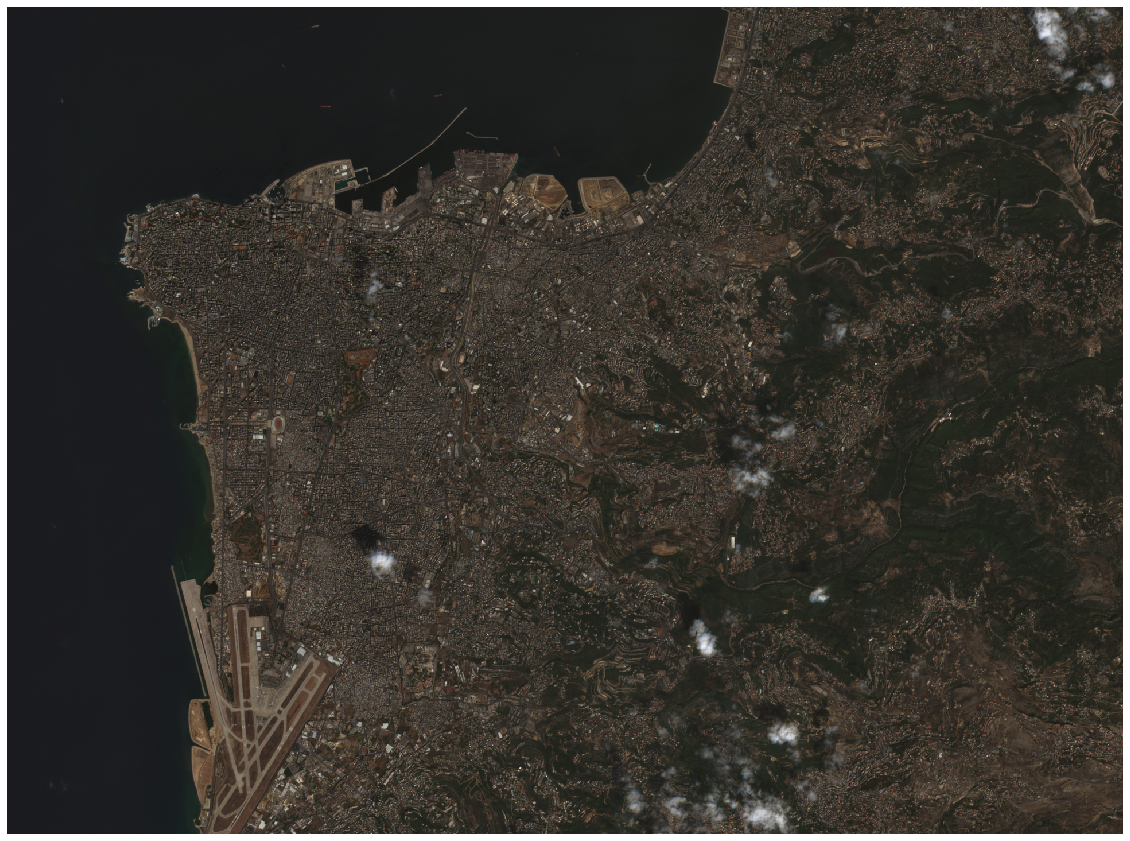

In [3]:
# Load all sentinel 2 bands, set nodata to 0
s2_data = beo.raster_to_array("/content/s2_10m.tif").filled(0)

# Load B12, normalise by 10000, add channel
b12 = (s2_data[:, :,  -1][:, :, np.newaxis] / 10000.0).astype("float32")

# Load RGB bands, normalise by 10000, channel already added due to slice.
rgb = (s2_data[:, :, 0:3] / 10000.0).astype("float32")

# Clear memory
s2_data = None

# Show RGB band.
plt.imshow(np.clip(rgb[:, :, ::-1], 0.0, 1.0), vmin=0.1, vmax=0.6, interpolation="nearest"); plt.axis('off')

In [4]:
model = get_s2super_model()

In [5]:
# Predict sharp image and confidence
b12_sharp, confidence = predict(model, [b12, rgb], b12, confidence_output=True, verbose=0, number_of_offsets=3, merge_method="max_conf")

(-0.5, 1944.5, 1440.5, -0.5)

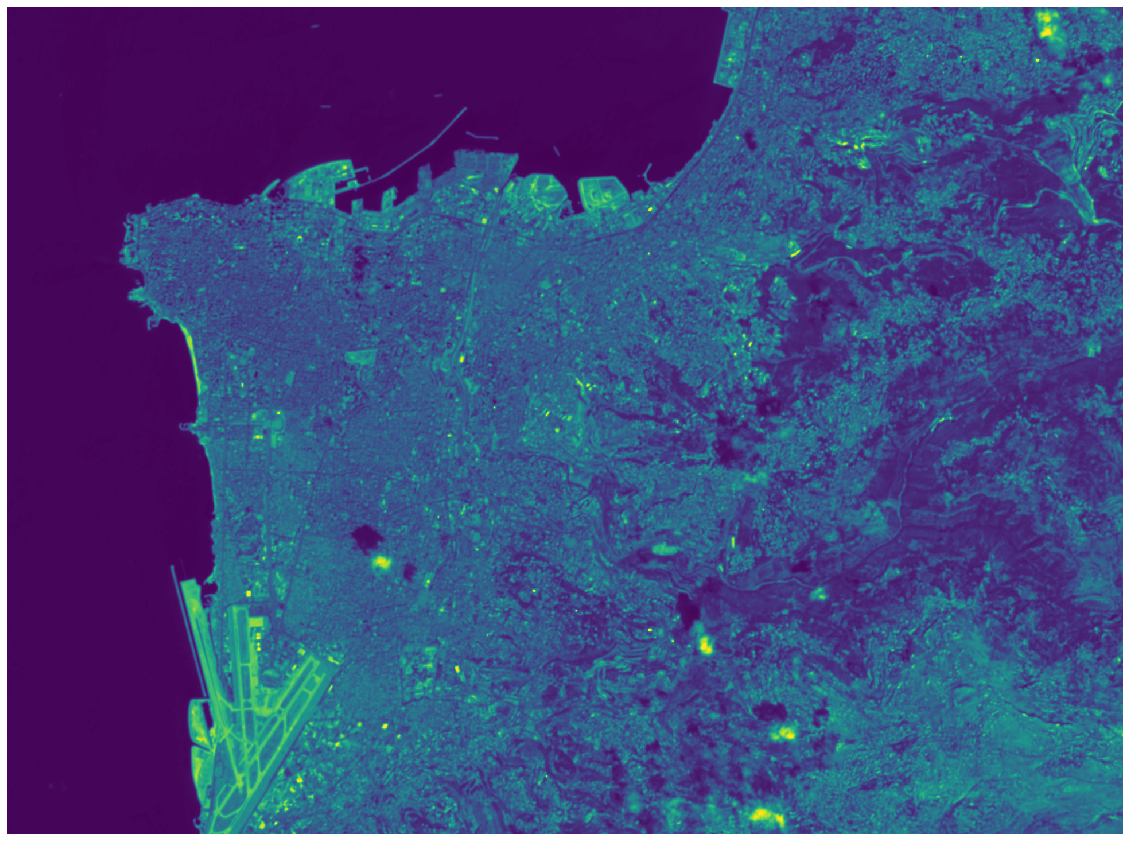

In [6]:
# Show B12 band - UNSHARP.
plt.imshow(b12[:, :, 0], vmin=0.1, vmax=0.7, interpolation="nearest"); plt.axis('off')

(-0.5, 1944.5, 1440.5, -0.5)

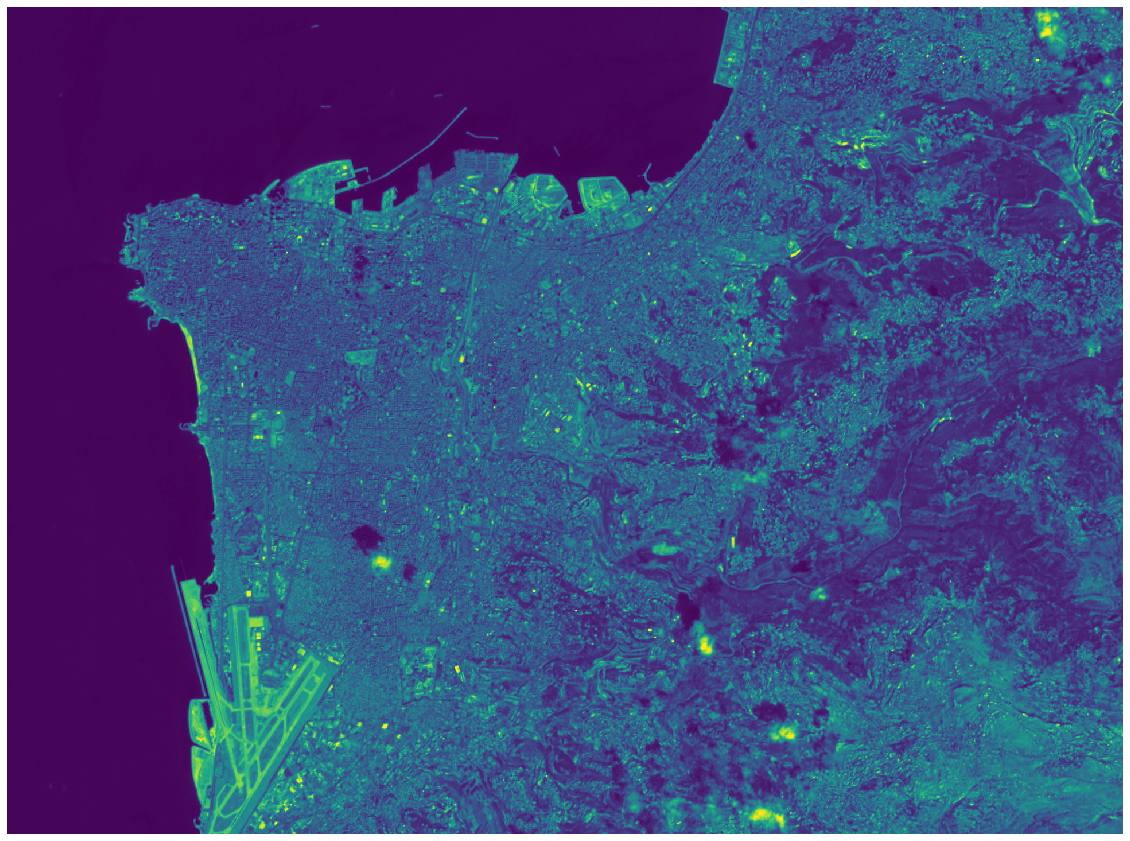

In [7]:
# Show B12 band - SHARP.
plt.imshow(b12_sharp[:, :, 0], vmin=0.1, vmax=0.7, interpolation="nearest"); plt.axis('off')